Loading YahooFinance Dataset

Pandas web data reader is an extension of pandas library to communicate with most updated financial data. This will include sources as: Yahoo Finance, Google Finance, Enigma, etc.

We will extract Apple Stocks Price using the following codes:

In [6]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series,DataFrame

In [10]:
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2017,1,11)

df=web.DataReader("AAPL",'yahoo', start, end)
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.727715
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275


In [12]:
#The above code had pulled 7 years of data from 2010 to 2017
#Exploring Rolling mean and Return rate of stocks

In [16]:
close_px=df['Adj Close']
mavg=close_px.rolling(window=100).mean()
mavg.tail()

Date
2017-01-05    107.249795
2017-01-06    107.335924
2017-01-09    107.433354
2017-01-10    107.533458
2017-01-11    107.641030
Name: Adj Close, dtype: float64

This will calculate the Moving Average for the last 100 windows (100 days) of stocks closing price and take the average for each of the window’s moving average.

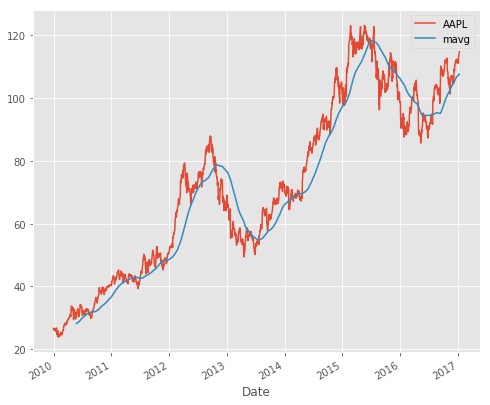

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

#Return Deviation — to determine risk and return

Following is the formula you could refer to:

Formula for Returns

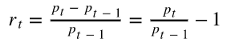

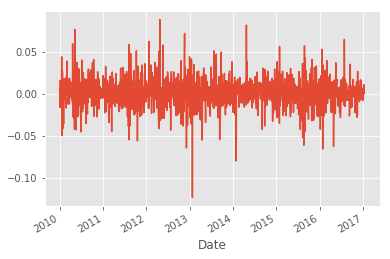

In [19]:
#Based on formula we can plot like this
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')


Logically, our ideal stocks should return as high and stable as possible. 

If you are risk averse(like me), you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of the stocks and competitor analysis.


In [20]:
#Analysis your competitors stocks

#In this segmnet we are going to analyse how our company is performing with the competitors 

In [23]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-05,111.727715,28.009964,794.020020,150.013260,59.230362
2017-01-06,112.973305,28.089943,806.150024,150.751312,59.743763
2017-01-09,114.008080,27.956650,806.650024,149.079559,59.553616
2017-01-10,114.123047,27.876667,804.789978,147.185501,59.534603
2017-01-11,114.736275,27.965532,807.909973,149.168472,60.076519


In [24]:
#corelation analysis - does one competitor affect others
#We can analyse the competition by running the percentage change and correlation function in pandas.

In [26]:
retcomp=dfcomp.pct_change()
corr=retcomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.381925,0.411879,0.384136,0.393774
GE,0.381925,1.000000,0.422535,0.535506,0.474491
GOOG,0.411879,0.422535,1.000000,0.403215,0.472263
IBM,0.384136,0.535506,0.403215,1.000000,0.496951
MSFT,0.393774,0.474491,0.472263,0.496951,1.000000


Text(0,0.5,'Returns GE')

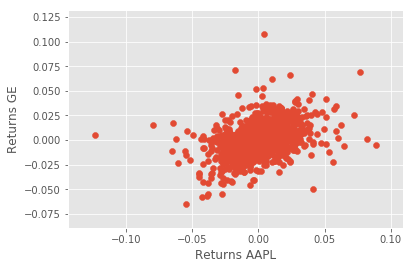

In [27]:
#lets plot Apple and GE
plt.scatter(retcomp.AAPL,retcomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

C:\Users\santhob\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.
C:\Users\santhob\AppData\Local\conda\conda\envs\py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\santhob\AppData\Local\conda\conda\envs\py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


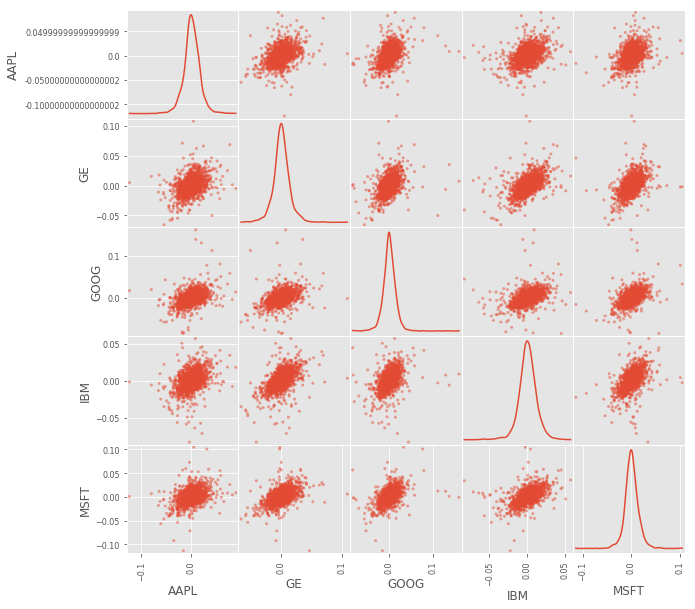

In [29]:
pd.scatter_matrix(retcomp, diagonal='kde', figsize=(10, 10));


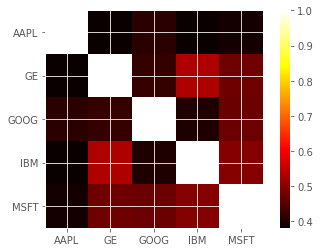

In [30]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [86]:
#Stocks Returns Rate and Risk

#Apart from correlation, we also analyse each stock’s risks and returns. 
#In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk).

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.272409
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704


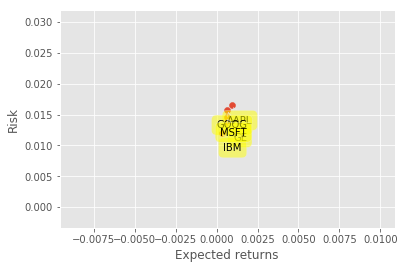

In [36]:
plt.scatter(retcomp.mean(), retcomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retcomp.columns, retcomp.mean(), retcomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Feature Engineering
We will use these three machine learning models to predict our stocks: 

Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN). But first, let us engineer some 

features: High Low Percentage and Percentage Change.

In [88]:


dfreg=df.loc[:,['Adj Close','Volume']]
dfreg['HL_percentage']=(df['High']-df['Low'])/ df['Close'] * 100.0
dfreg['percentage_change']=(df['Close']-df['Open'])/df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_percentage,percentage_change
Date,,,,
2009-12-31,26.272409,88102700.0,1.323968,-1.126074
2010-01-04,26.681330,123432400.0,0.990606,0.271752
2010-01-05,26.727465,150476200.0,1.091520,-0.102519
2010-01-06,26.302330,138040000.0,2.123523,-1.590633
2010-01-07,26.253704,119282800.0,1.400893,-0.552538


# Preprocessing and cross vaidation

->Drop missing value

->Separating the label here, we want to predict the AdjClose


->Scale the X so that everyone can have the same distribution for linear regression

->Finally We want to find Data Series of late X and early X (train) for model generation and evaluation

->Separate label and identify it as y

->Separation of training and testing of model by cross validation train test split

In [89]:
#drop missing value

dfreg.fillna(value=-99999,inplace=True)
dfreg.tail()


,Adj Close,Volume,HL_percentage,percentage_change
Date,,,,
2017-01-05,111.727715,22193600.0,0.900440,0.595240
2017-01-06,112.973305,31751900.0,1.433299,0.967636
2017-01-09,114.008080,33561900.0,1.252204,0.881730
2017-01-10,114.123047,24462100.0,0.906720,0.286271
2017-01-11,114.736275,27588600.0,1.110649,0.850600


In [103]:
## We want to separate 1 percent of the data to forecast

import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm
print(dfreg.shape)
forecast_out=int(math.ceil(0.01 * len(dfreg)))
forecast_out #1% of 1770 entries 

(1770, 5)


18

In [104]:
#separating the label here we want to predict the adj here
import numpy as np
forecast_col='Adj Close'
dfreg['label']=dfreg[forecast_col].shift(-forecast_out)
x=np.array(dfreg.drop(['label'],1))


In [105]:
#scale the X so that every1 can access the same distribution for linear regression.
x=preprocessing.scale(x)

In [106]:
#finally we want to find the late x and early x (train for model generation and evaluation)

In [107]:
x_lately=x[-forecast_out:]
x=x[:-forecast_out]

In [108]:
#separate label and identify it as y
y=np.array(dfreg['label'])
y=y[:-forecast_out]
#print("x",x)
#print("y",y)
print('Dimension of X',x.shape)
print('Dimension of y',y.shape)

Dimension of X (1752, 4)
Dimension of y (1752,)


In [109]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)


In [110]:
#Model generation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [112]:
#Linear regression
clfreg=LinearRegression(n_jobs=-1)
clfreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [113]:
#quadratic regression 2
clfpoly2=make_pipeline(PolynomialFeatures(2),Ridge())
clfpoly2.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [114]:
#Quadratic regression 3
clfpoly3=make_pipeline(PolynomialFeatures(3),Ridge())
clfpoly3.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [115]:
#KNN Regression

clfknn=KNeighborsRegressor(n_neighbors=3)
clfknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

# Test the model:


In [118]:
confidencereg=clfreg.score(X_test,y_test)
confidencereg1=clfpoly2.score(X_test,y_test)
confidencereg2=clfpoly3.score(X_test,y_test)
confidencknn=clfknn.score(X_test,y_test)
print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencereg1)
print("The quadratic regression 3 confidence is ",confidencereg2)
print("The knn regression confidence is ",confidencknn)

The linear regression confidence is  0.9640788590911014
The quadratic regression 2 confidence is  0.9649253041519721
The quadratic regression 3 confidence is  0.9648519258280769
The knn regression confidence is  0.9481972253787008


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times.

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind.

We need to plot out the graph to make the most sense of it

In [122]:
# Ridge Regression
